# Flight Prediction

we are going to do analysis on Flight dataset

In [245]:
# Lets Import the required Python library to start the Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Import the data set using pandas pd.read_excel() Here we have 2 dataset One is Train and another one is Test

In [246]:
df_train = pd.read_excel("C:\\Users\\Ravi Nadageri\\Documents\\Flight_prediction\\Data_Train.xlsx")

df_train.head()

#lets print the data head for review

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [247]:
df_test = pd.read_excel("C:\\Users\\Ravi Nadageri\\Documents\\Flight_prediction\\Test_set.xlsx")
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [248]:

print('Train dataset - Lets see the data shape' , df_train.shape)

print('Test dataset-  Lets see the data shape' , df_test.shape)

print('df_train - Null column' , [i for i in df_train.columns if df_train[i].isnull().sum()>0])

print('df_test Null column', [i for i in df_test.columns if df_test[i].isnull().sum()>0])

Train dataset - Lets see the data shape (10683, 11)
Test dataset-  Lets see the data shape (2671, 10)
df_train - Null column ['Route', 'Total_Stops']
df_test Null column []


So above we saw the test dataset is missing the Price that means we have to predict the price for test data set using Train data set, # So lets start

In [249]:
df = df_train #creating a dataframe as a variable name of " df "

In [250]:
# lets check the data set details 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


#### check the null values 

In [251]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [252]:
df[df['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [253]:
df[df['Total_Stops'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [254]:
df.drop(df.index[9039],axis=0,inplace=True) #drop the row number 9039

In [255]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662


# Visualization of dataset

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Price'>

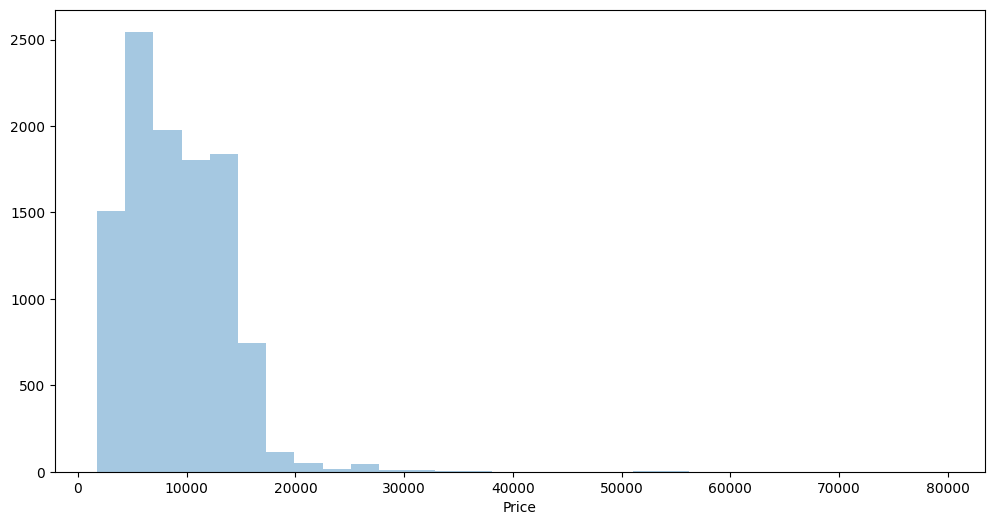

In [136]:
plt.rcParams['figure.figsize'] = (12,6)

sns.distplot(df['Price'],kde = False,bins = 30)

<AxesSubplot:xlabel='Price', ylabel='Airline'>

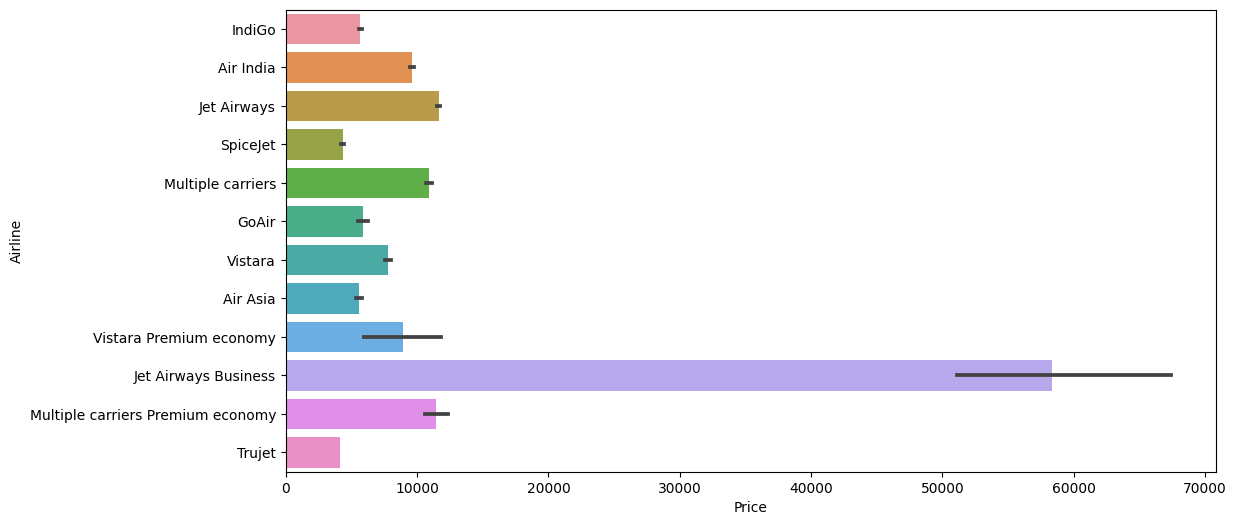

In [137]:
sns.barplot(x = 'Price',y = 'Airline',data = df)

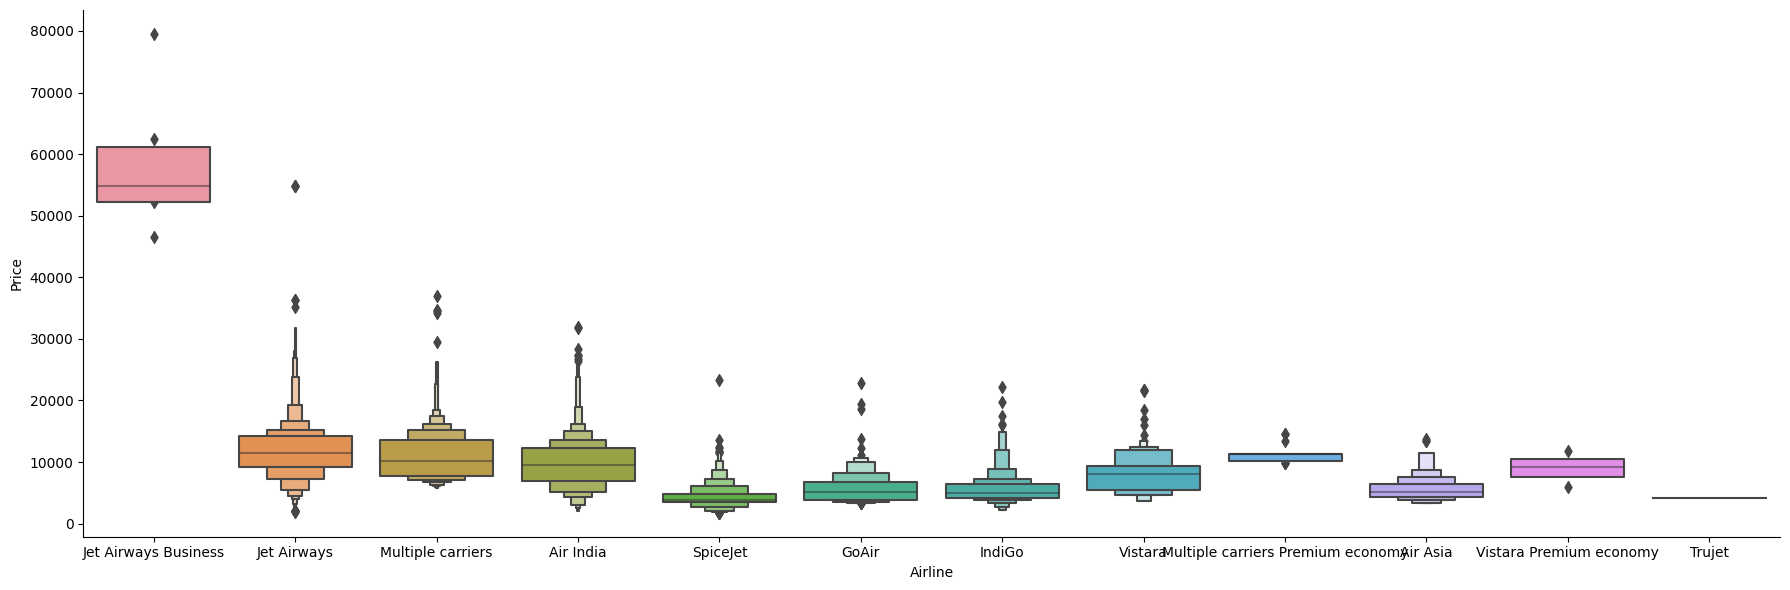

In [256]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

<AxesSubplot:xlabel='count', ylabel='Airline'>

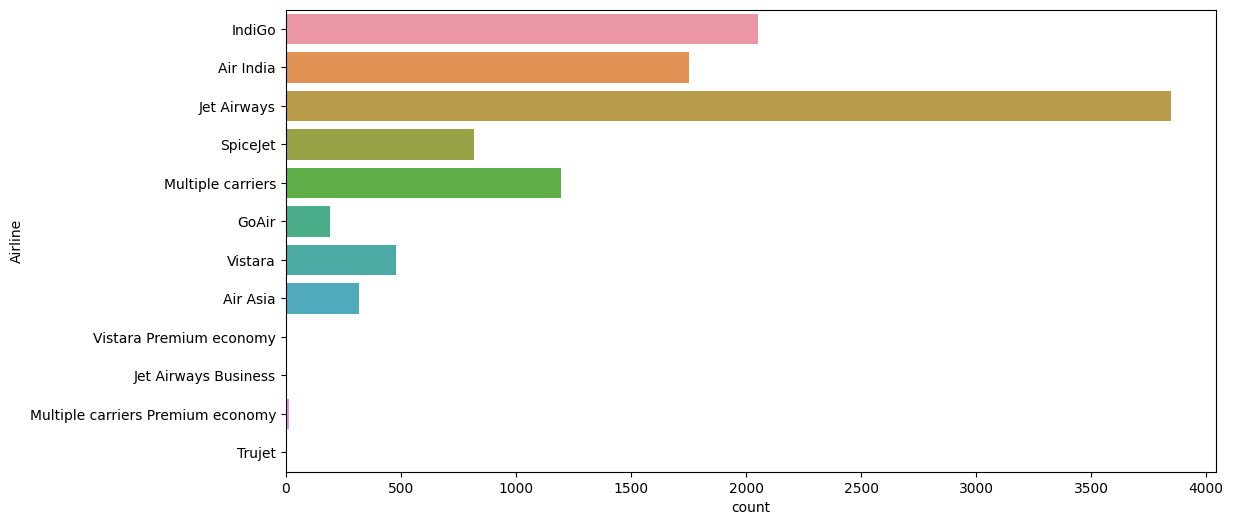

In [138]:
sns.countplot(y = 'Airline',data = df)

<AxesSubplot:xlabel='Price', ylabel='Source'>

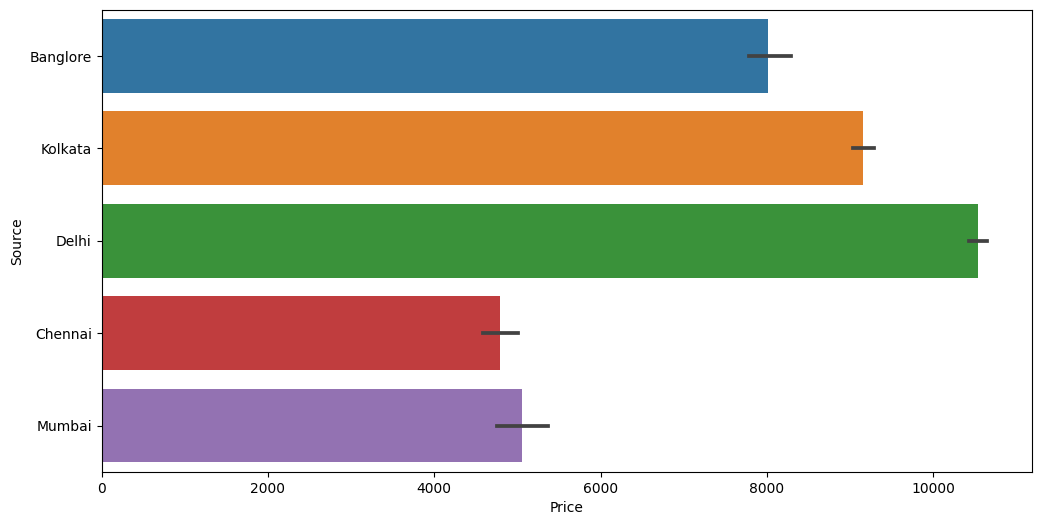

In [139]:
sns.barplot(x = 'Price',y = 'Source',data = df)

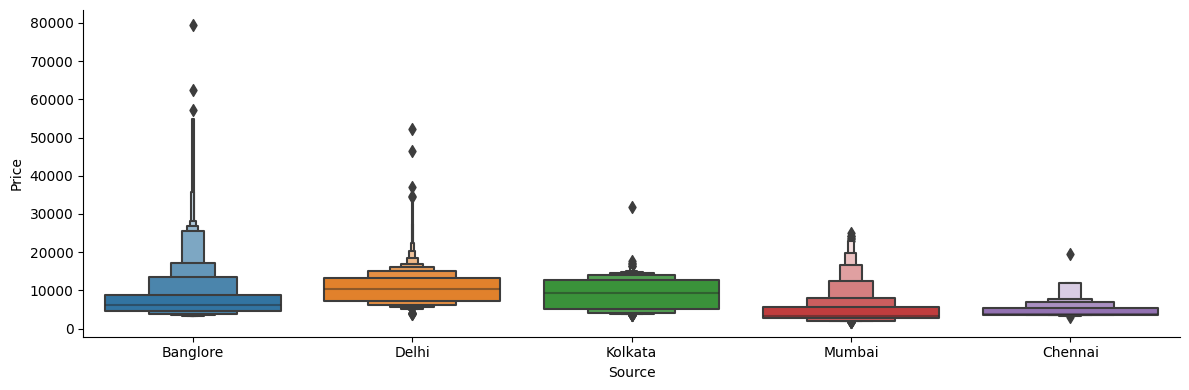

In [257]:
sns.catplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Destination'>

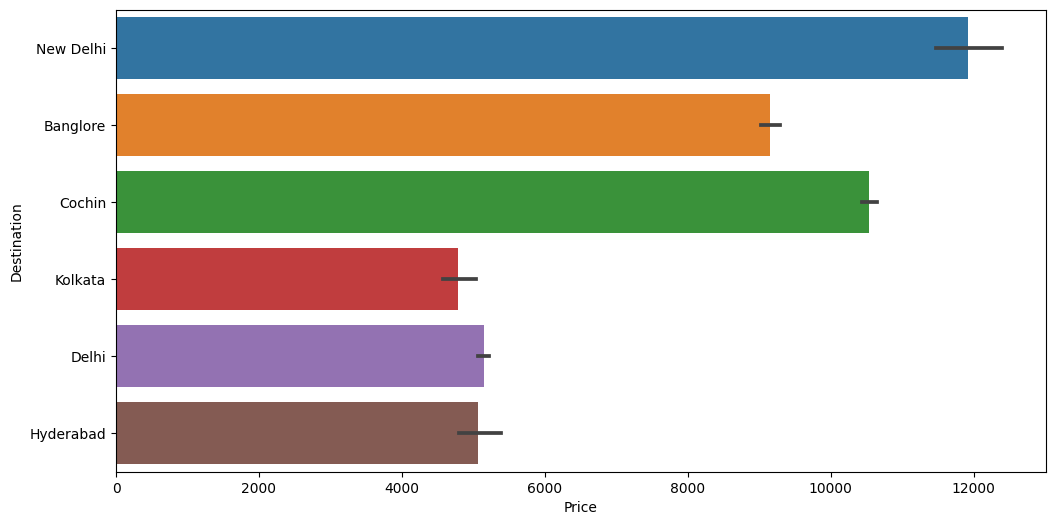

In [140]:
sns.barplot(x = 'Price',y = 'Destination',data = df)

<AxesSubplot:xlabel='count', ylabel='Source'>

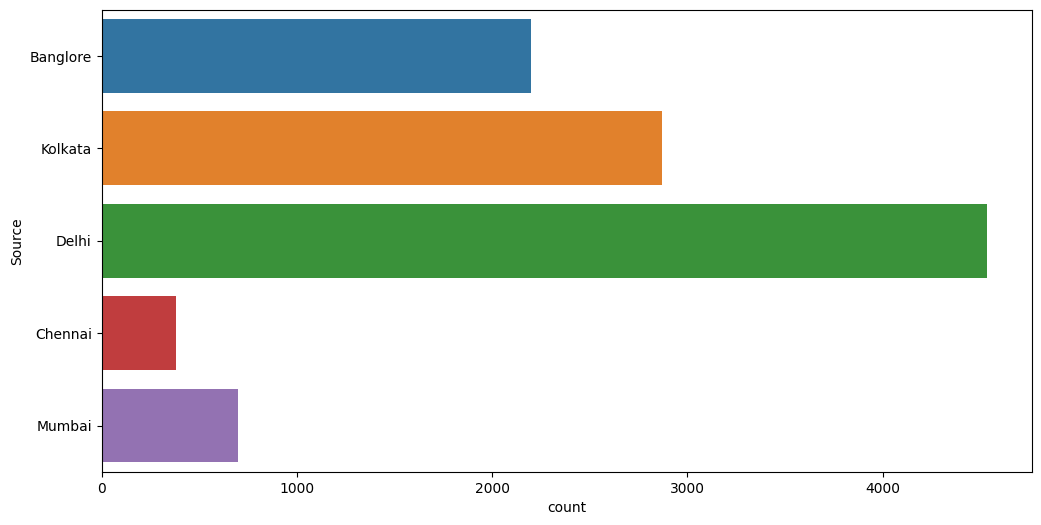

In [141]:
sns.countplot(y = 'Source',data = df)

<AxesSubplot:xlabel='Price', ylabel='Airline'>

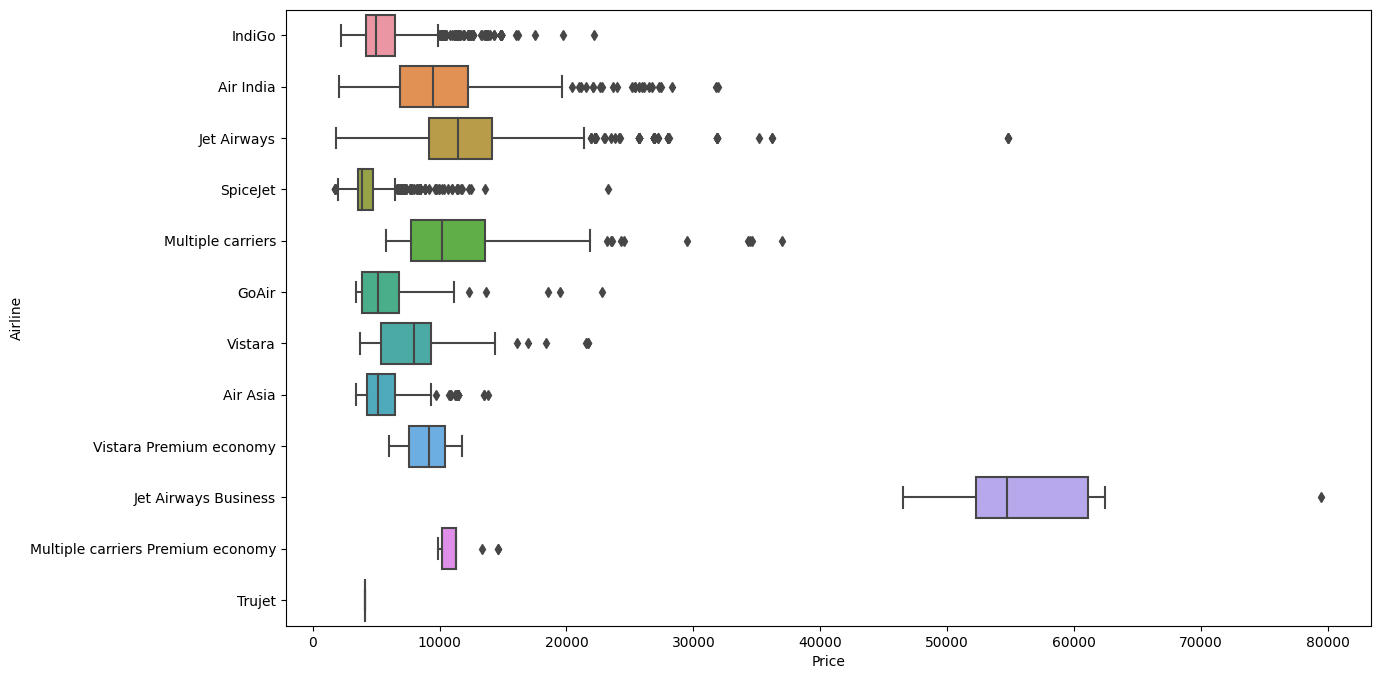

In [142]:
plt.figure(figsize = (14,8))
sns.boxplot(x = 'Price', y = 'Airline', data = df)

<AxesSubplot:xlabel='Total_Stops', ylabel='count'>

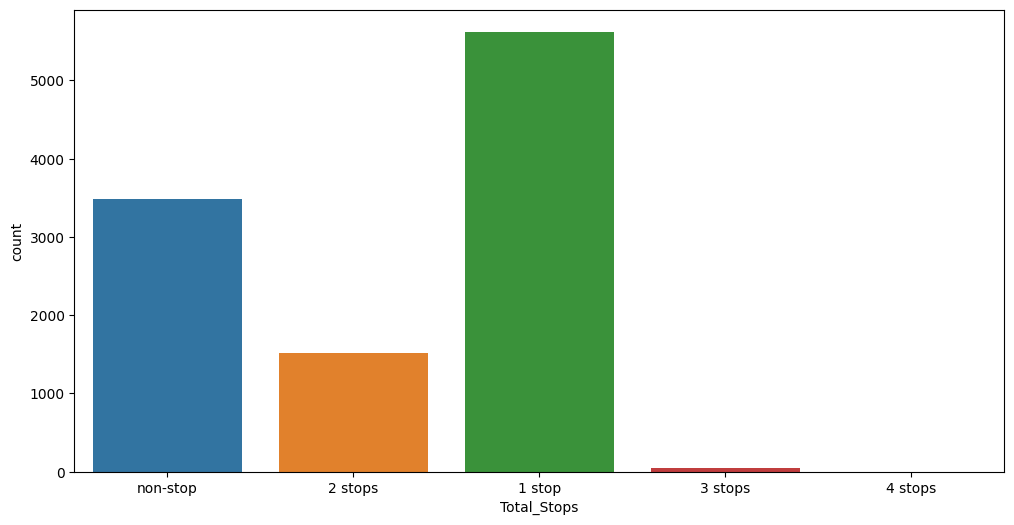

In [143]:
sns.countplot(x = 'Total_Stops',data = df)

<AxesSubplot:xlabel='Price', ylabel='Total_Stops'>

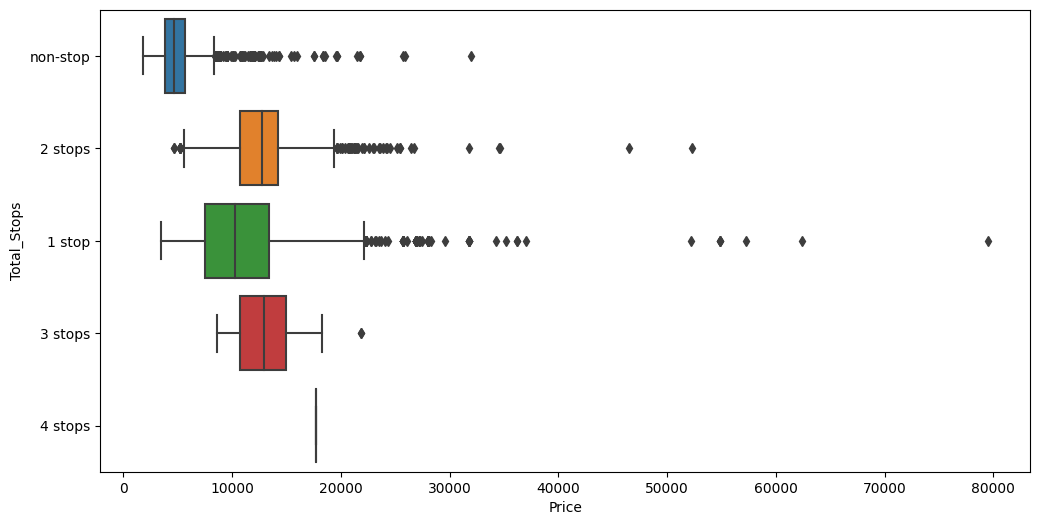

In [144]:
sns.boxplot(x = 'Price',y = 'Total_Stops', data = df)

So lets begun the Data Process and Manipulation

Fisrt take the Date of Jpurney cplumn and extact the date , month and year from that column

In [145]:
# Using Indexing we can grab the date month year after split function

df['Day_of_Journey'] = df.Date_of_Journey.str.split('/').str[0]
df['Month_of_Journey'] = df.Date_of_Journey.str.split('/').str[1]
df['Year_of_Journey'] = df.Date_of_Journey.str.split('/').str[2]

In [146]:
df.head(2) #so we get the new column for day, Month, Year

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,05,2019


Now we can drop the "Date_of_Journey" column , this no more useful to us

In [147]:
df.drop('Date_of_Journey',axis=1,inplace=True)

We have to convert the data type for newly created column using .astype(int)

In [148]:
df['Day_of_Journey'] = df.Day_of_Journey.astype(int)
df['Month_of_Journey'] = df.Month_of_Journey.astype(int)
df['Year_of_Journey'] = df.Year_of_Journey.astype(int)

In [149]:
df.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Day_of_Journey',
       'Month_of_Journey', 'Year_of_Journey'],
      dtype='object')

we have one more column similar to date of journy which is " Arrival_Time " from this column we can separate the Hour and minuts, using split() fnunction 

In [150]:
df['Arrival_Time'] = df.Arrival_Time.apply(lambda x : x.split()).str[0]

# Let's do some Feature Engineering

In [151]:
df['Arrival_Hour'] = df.Arrival_Time.apply(lambda x : x.split(':')).str[0] # index 0 = Hour
df['Arrival_Hour']

0        01
1        13
2        04
3        23
4        21
         ..
10678    22
10679    23
10680    11
10681    14
10682    19
Name: Arrival_Hour, Length: 10682, dtype: object

In [152]:
df['Arrival_min'] = df.Arrival_Time.apply(lambda x : x.split(':')).str[1] # index  = Minute
df.Arrival_min

0        10
1        15
2        25
3        30
4        35
         ..
10678    25
10679    20
10680    20
10681    10
10682    15
Name: Arrival_min, Length: 10682, dtype: object

Both hour and minute column are object type, so we have to convert them in to integer

In [153]:
df['Arrival_min'] = df.Arrival_min.astype(int)
df['Arrival_Hour'] = df.Arrival_Hour.astype(int)

In [154]:
df.drop('Arrival_Time',axis=1,inplace=True) # wo can drop this column now

same way we can process the Departure Hour and min column from Dep_time column 

In [155]:
df['Dep_Hour'] = df.Dep_Time.apply(lambda x : x.split(':')).str[0]
df['Dep_min'] = df.Dep_Time.apply(lambda x : x.split(':')).str[1]
df['Dep_Hour'] = df.Dep_Hour.astype(int)
df['Dep_min'] = df.Dep_min.astype(int)

In [156]:
df.drop('Dep_Time',axis=1,inplace=True) # wo can drop this column now

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10682 non-null  object
 5   Total_Stops       10682 non-null  object
 6   Additional_Info   10682 non-null  object
 7   Price             10682 non-null  int64 
 8   Day_of_Journey    10682 non-null  int32 
 9   Month_of_Journey  10682 non-null  int32 
 10  Year_of_Journey   10682 non-null  int32 
 11  Arrival_Hour      10682 non-null  int32 
 12  Arrival_min       10682 non-null  int32 
 13  Dep_Hour          10682 non-null  int32 
 14  Dep_min           10682 non-null  int32 
dtypes: int32(7), int64(1), object(7)
memory usage: 1.0+ MB


Its time to convert the categorical data in to Numerical format 

In [158]:
df.Total_Stops.unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

We can use map() function to replace this categorical information in to numerical as below

In [159]:
df.Total_Stops = df.Total_Stops.map({'non-stop':0, '2 stops': 2 , '1 stop': 1, '3 stops':3, '4 stops':4})

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Airline           10682 non-null  object
 1   Source            10682 non-null  object
 2   Destination       10682 non-null  object
 3   Route             10682 non-null  object
 4   Duration          10682 non-null  object
 5   Total_Stops       10682 non-null  int64 
 6   Additional_Info   10682 non-null  object
 7   Price             10682 non-null  int64 
 8   Day_of_Journey    10682 non-null  int32 
 9   Month_of_Journey  10682 non-null  int32 
 10  Year_of_Journey   10682 non-null  int32 
 11  Arrival_Hour      10682 non-null  int32 
 12  Arrival_min       10682 non-null  int32 
 13  Dep_Hour          10682 non-null  int32 
 14  Dep_min           10682 non-null  int32 
dtypes: int32(7), int64(2), object(6)
memory usage: 1.0+ MB


In [161]:
df.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2,No info,7662,1,5,2019,13,15,5,50


Now lets focuse on Duration which need to be process

In [162]:
df[df['Duration'] == '5m']

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
6474,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,2,No info,17327,6,3,2019,16,55,16,50


saw some of the "Duration_hour" is only 5min which will be the false data so lets delete them

In [163]:
#Dropping Unnecessary features after doing feature engineering
df.drop(6474,axis=0,inplace=True)
df.drop(2660,axis=0,inplace=True)

Now we have to convert the duration hour and time in to total time in minuts

In [164]:
# # Convert Time to hour.
# def time_to_hour(time):
#     if 'h' in time:
#         index_h = time.index('h')
#         hour = int(time[:index_h]) 
#         minute = 0
#     else:
#         hour = 0
#         minute = int(time[:-1])
    
#     if len(time) > 4:
#         minute = int(time[-3:-1])
        
#     return hour + minute / 60

In [165]:
duration = list(df['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())
dur_hours = []
dur_minutes = []  
 
for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
     
 
df['Duration_hours'] = dur_hours #create a new column
df['Duration_minutes'] =dur_minutes #create a new column
df.loc[:,'Duration_hours'] *= 60 #Converting hour in to the minutes by multipler 60
df['Duration_Total_mins']= df['Duration_hours']+df['Duration_minutes']

In [166]:
df.drop(['Duration', 'Duration_hours', 'Duration_minutes'], axis = 1, inplace = True)

In [167]:
df.head(2)

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Duration_Total_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,0,No info,3897,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2,No info,7662,1,5,2019,13,15,5,50,445


In [168]:
# we can drop the unwanted columns Route and additional info
df.drop('Route',inplace=True,axis=1)
df.drop('Additional_Info',inplace=True,axis=1)

So still there are 3 feture which are in categorical format which needs to be convert in to numerical type
use the labelencoder fuction to convert them in single line instead of MAP() function 

In [169]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()

In [170]:
df['Airline']=labelencoder.fit_transform(df['Airline'])
df['Source']=labelencoder.fit_transform(df['Source'])
df['Destination']=labelencoder.fit_transform(df['Destination'])

In [171]:
df.shape

(10680, 13)

In [172]:
df.isnull().sum()

Airline                0
Source                 0
Destination            0
Total_Stops            0
Price                  0
Day_of_Journey         0
Month_of_Journey       0
Year_of_Journey        0
Arrival_Hour           0
Arrival_min            0
Dep_Hour               0
Dep_min                0
Duration_Total_mins    0
dtype: int64

In [173]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day_of_Journey,Month_of_Journey,Year_of_Journey,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Duration_Total_mins
0,3,0,5,0,3897,24,3,2019,1,10,22,20,170
1,1,3,0,2,7662,1,5,2019,13,15,5,50,445


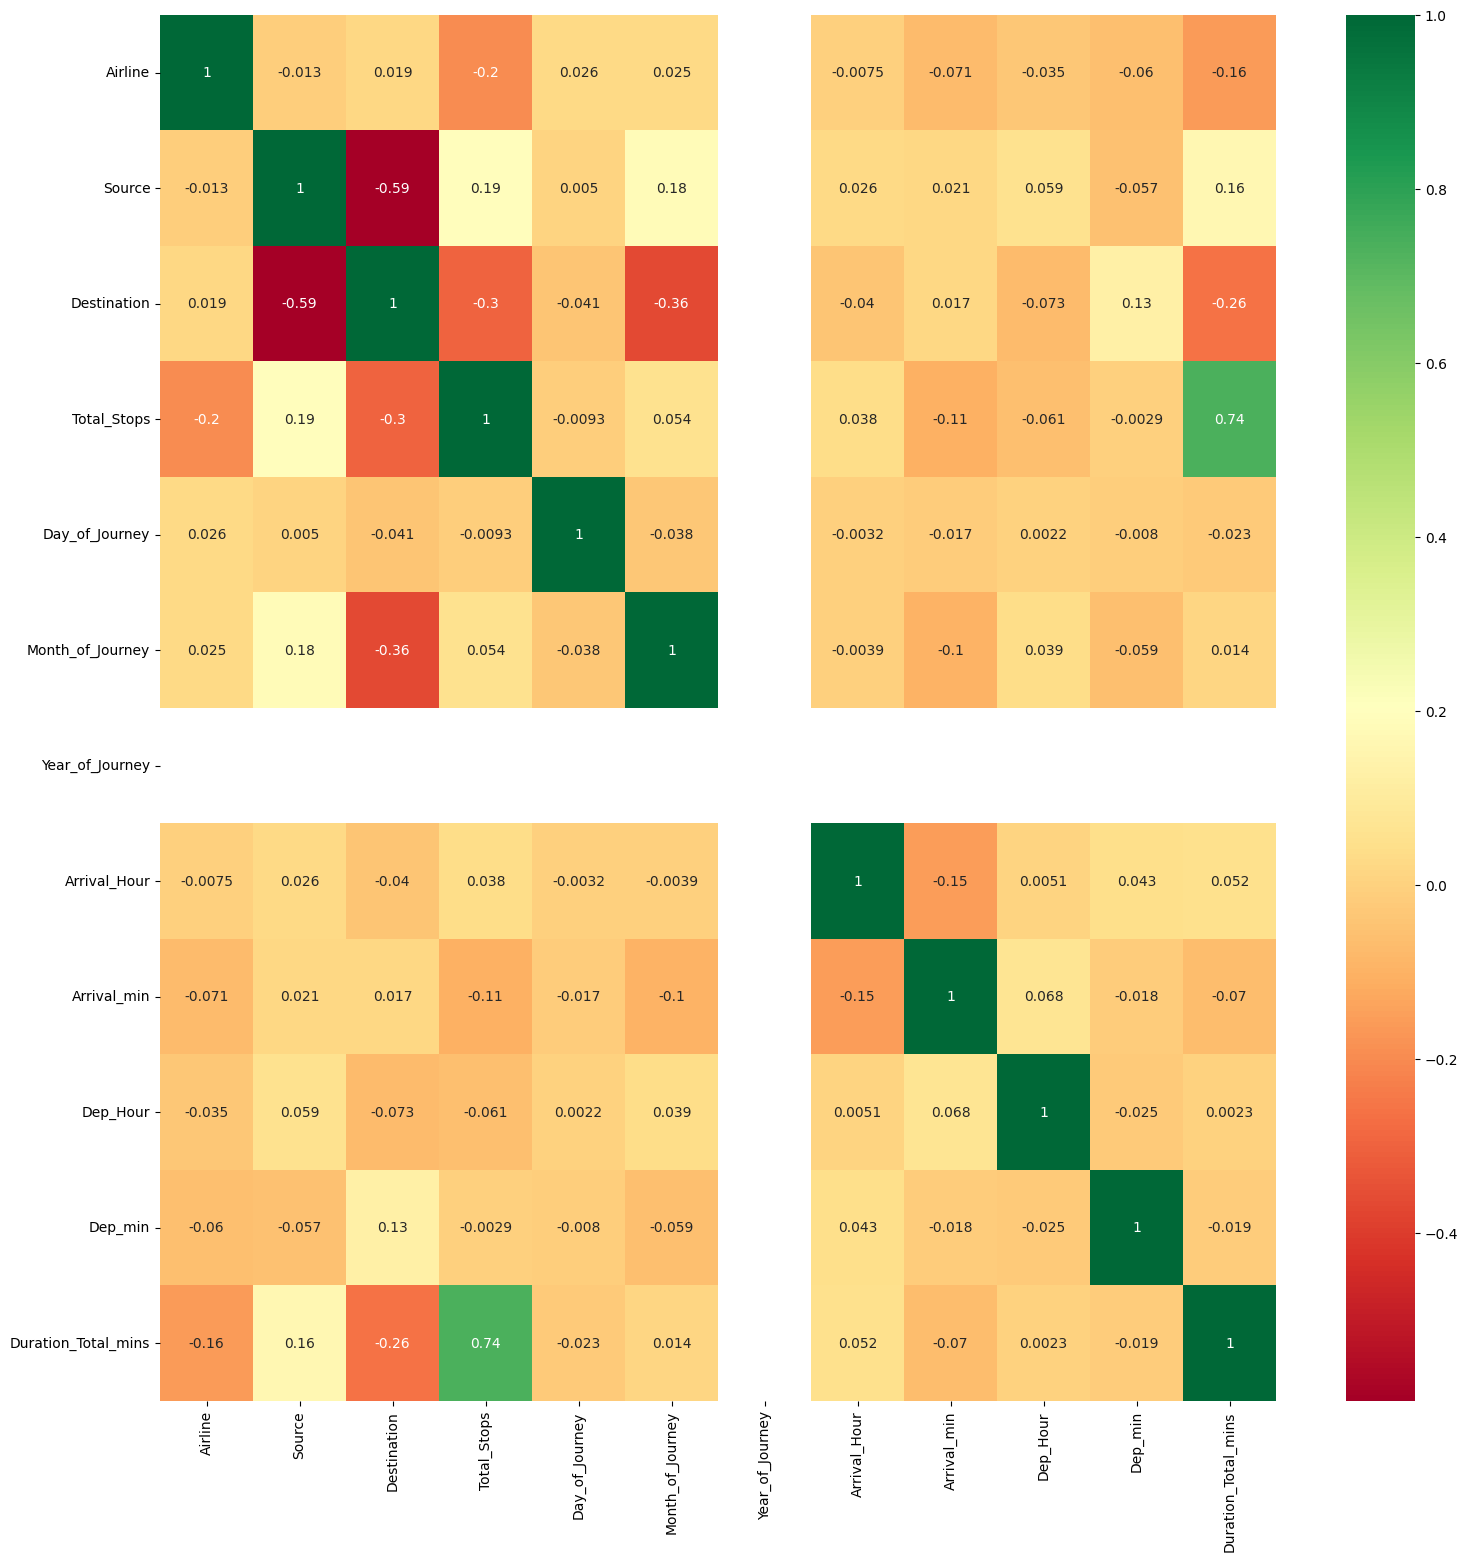

In [192]:
plt.figure(figsize = (18,18))
sns.heatmap(X.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [174]:
X = df[:]

In [175]:
X.drop(['Price'], axis = 1, inplace = True)

C:\Users\Ravi Nadageri\AppData\Local\Temp\ipykernel_8964\2068872871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(['Price'], axis = 1, inplace = True)


In [176]:
X.head()

,Airline,Source,Destination,Total_Stops,Day_of_Journey,Month_of_Journey,Year_of_Journey,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Duration_Total_mins
0,3,0,5,0,24,3,2019,1,10,22,20,170
1,1,3,0,2,1,5,2019,13,15,5,50,445
2,4,2,1,2,9,6,2019,4,25,9,25,1140
3,3,3,0,1,12,5,2019,23,30,18,5,325
4,3,0,5,1,1,3,2019,21,35,16,50,285


In [177]:
X.shape

(10680, 12)

Separate the X and Y data so we can prepare the predict model

In [178]:
y = df['Price']
y.shape

(10680,)

Lets import the sklearn model to start the model building

In [179]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Lets Prepare model Method - 1

The below 1 will take around 10 min to prepare so run and just chill

In [181]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]

max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()


# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3,
                                verbose=2, random_state=42, n_jobs = -1)


# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

Lets check the values of model

In [182]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': False}

In [183]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators= 1000,
 min_samples_split= 10,
 min_samples_leaf= 1,
 max_features= 'sqrt',
 max_depth= 80,
 bootstrap= False)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

Lets check the score of this model

In [184]:
rf.score(X_test, y_test)

0.8091044108876916

Lets check accuracy score

In [186]:
from sklearn.metrics import accuracy_score,r2_score
rs=r2_score(y_test,y_pred)
print(rs)

0.8091044108876916


In [187]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print(rmse)

2050.272202015751


In [188]:
print(1 - np.sqrt(np.square(np.log10(y_pred +1) - np.log10(y_test +1)).mean()))

0.9181602940063314


So this what above we are getting the accuracy from the model Method 1

Lets do something more deeper # Method 2

In [196]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

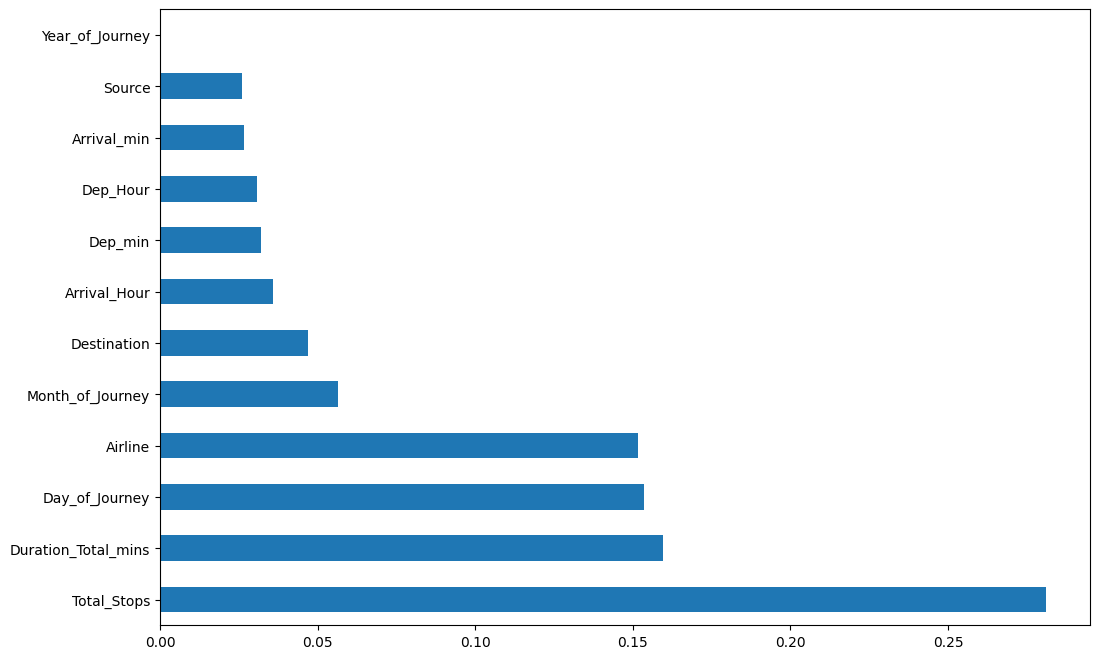

In [197]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [198]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [199]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [200]:
y_pred = reg_rf.predict(X_test)

In [201]:
reg_rf.score(X_train, y_train)

0.9519178883138089

In [202]:
reg_rf.score(X_test, y_test)

0.8003508623467585

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


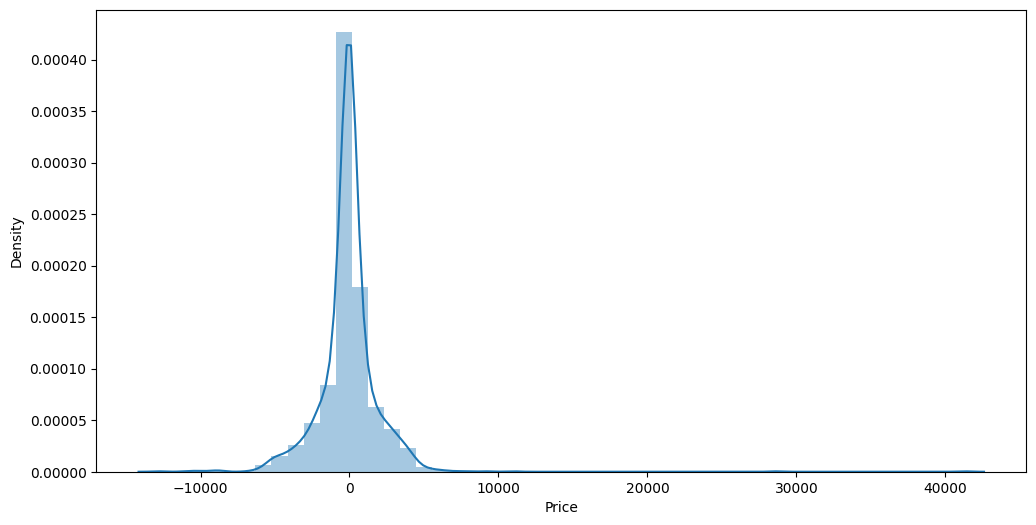

In [203]:
sns.distplot(y_test-y_pred)
plt.show()

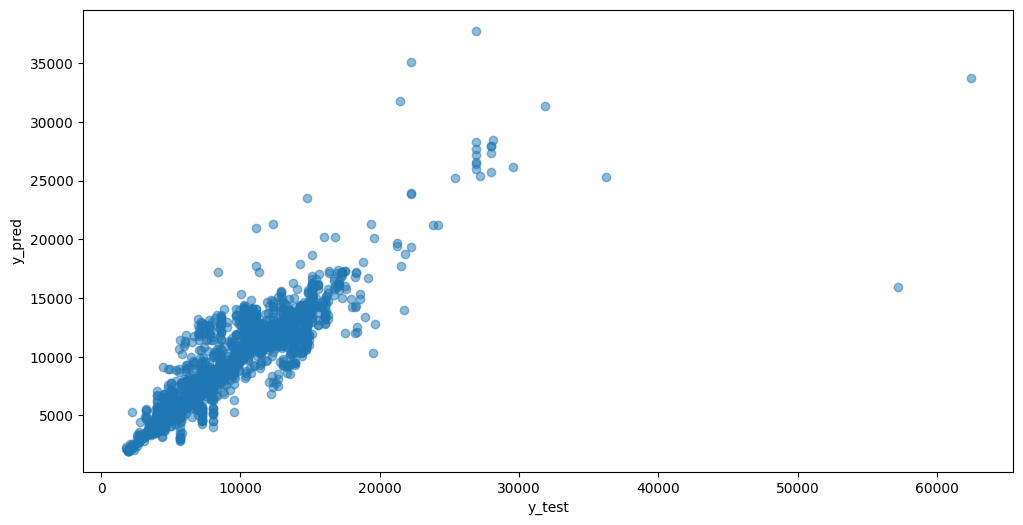

In [204]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [205]:
from sklearn import metrics

In [206]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1147.295134191781
MSE: 4401421.074182166
RMSE: 2097.956404261577


In [207]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [208]:
metrics.r2_score(y_test, y_pred)

0.8003508623467585

# Method- 3
similar to method 1

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [209]:

from sklearn.model_selection import RandomizedSearchCV

#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error',
                                n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [210]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   6.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.2s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.7s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   3.0s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.9s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=100, n_estimators=300; total time=   2.9s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.8s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.8s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   4.8s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.2s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=5, min_samples_split=5, n_estimators=400; total time=   5.1s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.4s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.8s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.3s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.4s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=700; total time=   8.3s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.0s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   8.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   8.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time=   9.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.9s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.6s
[CV] END max_depth=5, max_feat

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   8.5s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   8.5s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   8.6s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   8.6s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=700; total time=   8.6s


c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [211]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [212]:
prediction = rf_random.predict(X_test)

c:\Users\Ravi Nadageri\Python_3_10\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


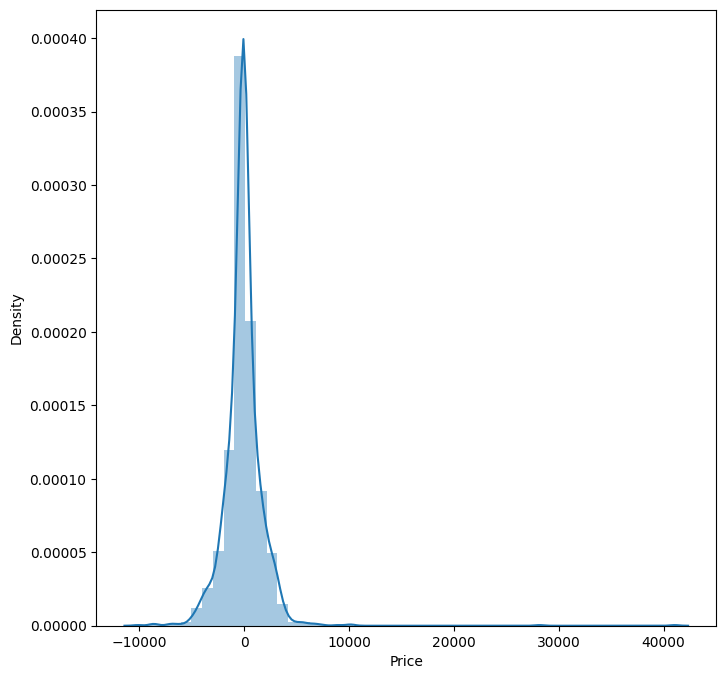

In [213]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

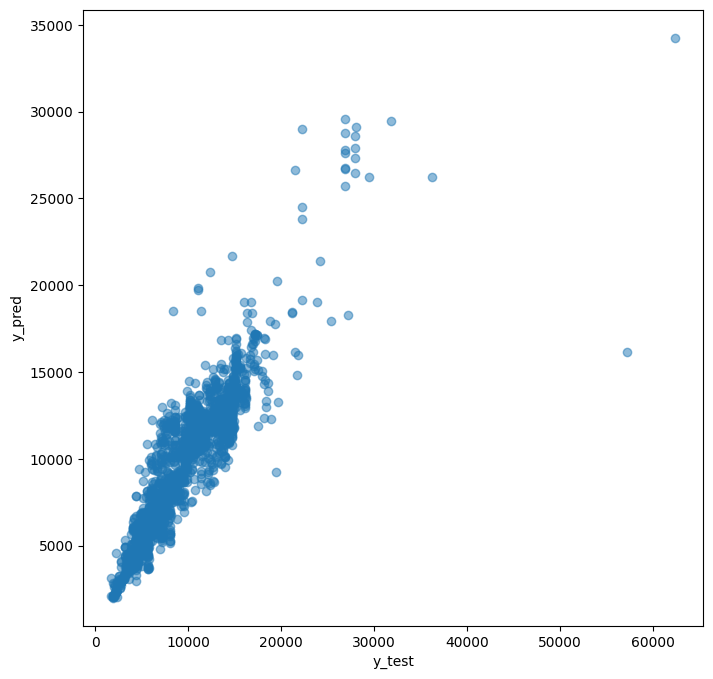

In [214]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [215]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1119.2685429652197
MSE: 3841170.662867696
RMSE: 1959.8904721610584


## We have to Save this model to reuse if require

In [216]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(rf_random, file)

In [217]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)

In [218]:
y_prediction = forest.predict(X_test)

In [219]:
metrics.r2_score(y_test, y_prediction)

0.8257639072710257

# Now it's time do one more model Training

in different configuration

In [220]:
from sklearn.model_selection import train_test_split

In [221]:
# Splitting Data into training and evaluation

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 101)

In [222]:
from sklearn.tree import DecisionTreeRegressor

In [223]:
dtree = DecisionTreeRegressor(min_samples_split=10)

In [224]:
# fitting the model

dtree.fit(X_train,y_train)

DecisionTreeRegressor(min_samples_split=10)

In [225]:
y_pred = dtree.predict(X_test)

In [227]:
from sklearn.metrics import mean_squared_log_error

print("Decision Tree Regressor 1-RMSLE:",1 - mean_squared_log_error(y_test,y_pred)**0.5)

Decision Tree Regressor 1-RMSLE: 0.7881940458124866


Let's check quickly score can be further improved by some other algorithms

In [228]:
from sklearn.svm import SVR

svr = SVR(C = 2000.0,epsilon = 0.1)

svr.fit(X_train,y_train)

SVR(C=2000.0)

In [229]:
y_pred2 = svr.predict(X_test)

print("SVR 1-RMSLE:",1 - mean_squared_log_error(y_test,y_pred2)**0.5)

SVR 1-RMSLE: 0.6677253957933122


In [230]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100,min_samples_split=12)

forest.fit(X_train,y_train)



RandomForestRegressor(min_samples_split=12)

In [231]:
y_pred3 = forest.predict(X_test)

print("Random Forest Regressor 1-RMSLE:",1 - mean_squared_log_error(y_test,y_pred3)**0.5)

Random Forest Regressor 1-RMSLE: 0.8230378331044228


In [232]:
from sklearn.ensemble import GradientBoostingRegressor
Grad = GradientBoostingRegressor(learning_rate=0.1,n_estimators=100)
Grad.fit(X_train,y_train)

y_pred4 = Grad.predict(X_test)
print("Gradient Boosting Regressor 1-RMSLE:",1 - mean_squared_log_error(y_test,y_pred4)**0.5)

Gradient Boosting Regressor 1-RMSLE: 0.7853820583776685


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10680 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Airline              10680 non-null  int32
 1   Source               10680 non-null  int32
 2   Destination          10680 non-null  int32
 3   Total_Stops          10680 non-null  int64
 4   Price                10680 non-null  int64
 5   Day_of_Journey       10680 non-null  int32
 6   Month_of_Journey     10680 non-null  int32
 7   Year_of_Journey      10680 non-null  int32
 8   Arrival_Hour         10680 non-null  int32
 9   Arrival_min          10680 non-null  int32
 10  Dep_Hour             10680 non-null  int32
 11  Dep_min              10680 non-null  int32
 12  Duration_Total_mins  10680 non-null  int64
dtypes: int32(10), int64(3)
memory usage: 750.9 KB


In [236]:
testdeta=df

In [240]:
testdeta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10680 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Airline              10680 non-null  int32
 1   Source               10680 non-null  int32
 2   Destination          10680 non-null  int32
 3   Total_Stops          10680 non-null  int64
 4   Day_of_Journey       10680 non-null  int32
 5   Month_of_Journey     10680 non-null  int32
 6   Year_of_Journey      10680 non-null  int32
 7   Arrival_Hour         10680 non-null  int32
 8   Arrival_min          10680 non-null  int32
 9   Dep_Hour             10680 non-null  int32
 10  Dep_min              10680 non-null  int32
 11  Duration_Total_mins  10680 non-null  int64
dtypes: int32(10), int64(2)
memory usage: 667.5 KB


In [242]:
#Lets test model

In [241]:
# Predictions on a sample of data whose real prices are not known

y_predict = forest.predict(testdeta)

In [243]:
new_df = pd.DataFrame(y_predict,columns = ['Price'])

new_df.head()

,Price
0,4940.165140
1,7614.702094
2,13721.419565
3,6264.322742
4,13219.658427


In [244]:
#Thank God!